# 2.1 Linear Functions

In [1]:
f(x) = x[1] + x[2] - x[4]^2

f (generic function with 1 method)

In [2]:
f([-1,0,1,2])

-5

In [4]:
a = [-2,0,1,-3];
adot(x) = a'*x # inner product function 

adot (generic function with 1 method)

In [5]:
x = [1,5,6,7]; y = [-2,3,8,1];
alpha = 1.5; beta = -3.7;

adot(alpha*x + beta*y)

-58.800000000000004

In [7]:
alpha*adot(x) + beta*adot(y)

-58.800000000000004

In [8]:
e3 = [0,0,1,0];
adot(e3)

1

In [15]:
avg(x) = (ones(length(x)) / length(x))'*x
avg([1:1:10;])

5.500000000000001

# 2.2 Taylor Approximation 

The (first-order) Taylor approximation of a function $f : R^n \to R$, at the point $z$, is the affine function of $x$ given by : 

$\hat{f}(x) = f(z) + \nabla f(z)^T(x-z)$

In [16]:
f(x) = x[1] + exp(x[2] - x[1]); # function
fgrad(x) = [1-exp(x[2] - x[1]), exp(x[2] - x[1])]; # gradient 

z = [1,2];
fhat(x, z) = f(z) + fgrad(z)'*(x-z);

In [18]:
x = [1,2]
f(x), fhat(x,z)

(3.718281828459045, 3.718281828459045)

In [19]:
x = [.96,1.98]
f(x), fhat(x,z)

(3.7331947639642977, 3.732647465028226)

In [20]:
x = [1.1,2.11]
f(x), fhat(x,z)

(3.845601015016916, 3.845464646743635)

# 2.3 Regression model

$ \hat{y}(x) = x^T\beta + v $

$ \hat{y}$ - prediction 

$y$ - actual result value 

$x$ input n-vector (feature vector)
- $x_i$ - each feature, regressor

Parameters:
- $\beta$ - weight vector 
- $v$ - offset (scalar)


In [21]:
# params 
beta = [148.73, -18.85]; v = 54.40

54.4

In [22]:
yhat(x) = x'*beta + v;

In [23]:
x = [.846, 1]; y = 115;

yhat(x), y

(161.37557999999999, 115)

In [24]:
x = [1.324, 2]; y = 234.50;

yhat(x), y

(213.61852000000002, 234.5)

In [26]:
using VMLS; 
D = house_sales_data();

In [27]:
price = D["price"]

774-element Vector{Float64}:
  94.905
  98.937
 100.309
 106.25
 107.502
 108.75
 110.7
 113.263
 116.25
 120.0
   ⋮
 229.027
 229.5
 230.0
 230.0
 232.425
 234.0
 235.0
 235.301
 235.738

In [28]:
area = D["area"]

774-element Vector{Float64}:
 0.941
 1.146
 0.909
 1.289
 1.02
 1.022
 1.134
 0.844
 0.795
 0.588
 ⋮
 1.358
 1.329
 1.715
 1.262
 2.28
 1.477
 1.216
 1.685
 1.362

In [29]:
beds = D["beds"]

774-element Vector{Int64}:
 2
 3
 3
 3
 3
 2
 2
 2
 2
 2
 ⋮
 3
 4
 4
 3
 4
 3
 3
 4
 3

In [40]:
x = [area beds]

774×2 Matrix{Float64}:
 0.941  2.0
 1.146  3.0
 0.909  3.0
 1.289  3.0
 1.02   3.0
 1.022  2.0
 1.134  2.0
 0.844  2.0
 0.795  2.0
 0.588  2.0
 ⋮      
 1.358  3.0
 1.329  4.0
 1.715  4.0
 1.262  3.0
 2.28   4.0
 1.477  3.0
 1.216  3.0
 1.685  4.0
 1.362  3.0

In [43]:
v = 54.4017;
beta = [148.7251, -18.8534];


yhat(x) = x*beta .+ v;
predicted = yhat(x)

774-element Vector{Float64}:
 156.6452191
 168.2804646
 133.0326159
 189.5481539
 149.541102
 168.6919522
 185.3491634
 142.21888439999998
 134.9313545
 104.1452588
   ⋮
 199.8101858
 176.6437579
 234.0516465
 185.5325762
 318.081328
 217.5084727
 178.69122159999998
 229.58989350000002
 200.4050862

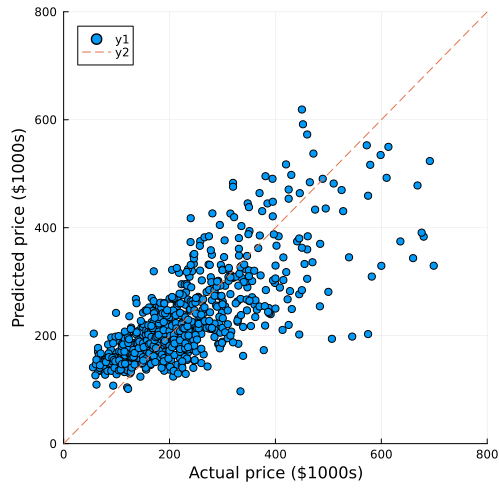

In [39]:
using Plots
scatter(price, predicted, lims = (0,800))
plot!([0,800],[0,800], linestyle=:dash)
plot!(xlims=(0,800),ylims=(0,800),size=(500,500))
plot!(xlabel="Actual price (\$1000s)", ylabel="Predicted price (\$1000s)")